# Project: Alcohol consumption of students

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline


In this project we use a dataset containing information about Portuguese students from two public schools. This is a real world dataset that was collected in order to study alcohol consumption in young people and its effects on students' academic performance. The dataset was built from two sources: school reports and questionnaires.

**Attributes:**

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
* 3 age - student's age (numeric: from 15 to 22) 
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- 13 traveltime - home to school travel time (numeric: 1 <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
- 16 schoolsup - extra educational support (binary: yes or no) 
- 17 famsup - family educational support (binary: yes or no) 
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- 19 activities - extra-curricular activities (binary: yes or no) 
- 20 nursery - attended nursery school (binary: yes or no) 
- 21 higher - wants to take higher education (binary: yes or no) 
- 22 internet - Internet access at home (binary: yes or no) 
- 23 romantic - with a romantic relationship (binary: yes or no) 
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
- 30 absences - number of school absences (numeric: from 0 to 93) 

**these grades are related with the course subject:**

- 31 G1 - first period grade (numeric: from 0 to 20) 
- 31 G2 - second period grade (numeric: from 0 to 20) 
- 32 G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
student_data = pd.read_csv("/Users/shin/Desktop/데이터 사이언스 기초/팀플/student.csv", sep=";")

# Question 1 (2pts)

**Please make new columns with the following variable name**

1. Alcohol consumption level (we will create it and call it `acl`)
 - Make a new columns of 'alcohol_index' = (5 * 'Dalc' + 2 * 'Walc')/7
 - If 'alcohol_index' <= 2, then 'acl' is 'low'. Otherwise, 'acl' is 'high'
2. Gender of the student (`gender`)
 - rename 'sex' as 'gender'

In [3]:
#정답
student_data['alcohol_index'] = (5 * student_data['Dalc'] + 2 * student_data['Walc']) / 7
student_data['acl'] = student_data['alcohol_index'].apply(lambda x: 'low' if x <= 2 else 'high')

student_data.rename(columns={'sex': 'gender'}, inplace=True)
student_data 

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1.000000,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1.000000,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2.285714,high
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1.000000,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1.285714,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,1.285714,low
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,1.000000,low
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,1.000000,low
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,3.285714,high


# Question 2 (1pt)

**Please calculate confidence intervals for means of the final grade ('G3')**

HINT) Because we have a sample size that is much greater than 30, we can use the Central Limit Theorem to calculate confidence intervals. According to this theorem we can calculate a confidence interval for the mean using the normal distribution.

In [4]:
#정답
mean_g3 = student_data['G3'].mean()
std_g3 = student_data['G3'].std()

n = len(student_data['G3'])

z_95 = stats.norm.ppf(0.975)  # Two-tailed test

margin_of_error = z_95 * (std_g3 / (n ** 0.5))

ci_lower = mean_g3 - margin_of_error
ci_upper = mean_g3 + margin_of_error

print(f"신뢰 구간: ({ci_lower}, {ci_upper})")

신뢰 구간: (11.65745768566587, 12.154560804318722)


## Question 3 (4pts)

**Are the population variances equal in the two groups of students (Low vs. High alcohol consumption)?**

You need to compare the variances of **the final grades** of the two groups!
- Set the hypothesis (1pt)
- Let's perform the levene's test whose Null Hypothesis is that the variances are equal. We will use a significance level of 0.05 (2pt)
- Make conclusions (1pt)

# 답

### Null Hypothesis (H0): The variances of final grades in the two groups (Low and High alcohol consumption) are equal.
### Alternative Hypothesis (H1): The variances of final grades in the two groups are not equal.

In [ ]:
grades_low_alcohol = student_data[student_data['acl'] == 'low']['G3']
grades_high_alcohol = student_data[student_data['acl'] == 'high']['G3']

levene_stat, p_value = levene(grades_low_alcohol, grades_high_alcohol)

print(f"Levene의 검정 통계량: {levene_stat}")

print(f"P-value: {p_value}")


alpha = 0.05

if p_value < alpha:

   print("귀무 가설 기각. 분산은 유의하게 다릅니다.")

else:

   print("귀무 가설 기각 실패. 분산은 동일합니다.")


Levene의 검정 통계량: 0.6503514980403117
P-value: 0.42028335860459587
귀무 가설 기각 실패. 분산은 동일합니다.


## Question 4 (1pt)

**Does alcohol consumption affect academic performance?**

Compare the distribution of the final grades of the two groups (Low vs. High alcohol consumption).
- You can use the boxplot

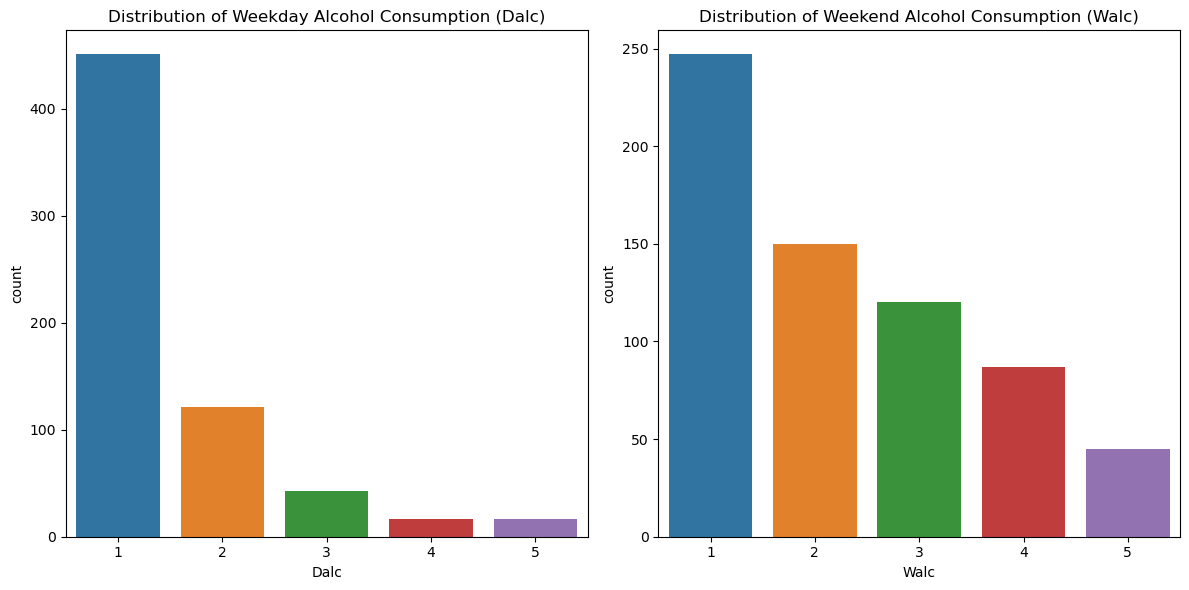

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Dalc', data=student_data)
plt.title('Distribution of Weekday Alcohol Consumption (Dalc)')

plt.subplot(1, 2, 2)
sns.countplot(x='Walc', data=student_data)
plt.title('Distribution of Weekend Alcohol Consumption (Walc)')

plt.tight_layout()
plt.show()

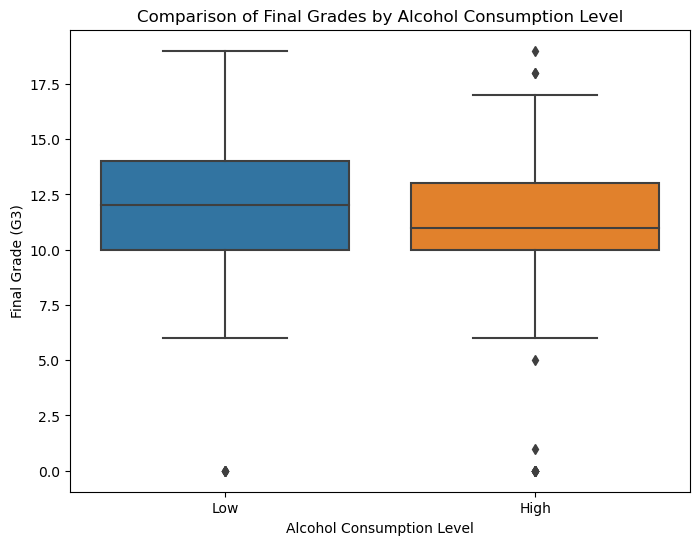

In [ ]:
student_data['AlcoholConsumption'] = (student_data['Dalc'] > 2) | (student_data['Walc'] > 2)
student_data['AlcoholConsumption'] = student_data['AlcoholConsumption'].map({True: 'High', False: 'Low'})

plt.figure(figsize=(8, 6))
sns.boxplot(x='AlcoholConsumption', y='G3', data=student_data)
plt.title('Comparison of Final Grades by Alcohol Consumption Level')
plt.xlabel('Alcohol Consumption Level')
plt.ylabel('Final Grade (G3)')
plt.show()


## Question 5 (2pts)

The visualizations sugest there is a difference between the means of the final grade of the two groups. Now we will perform a formal statistical test to confirm the hypothesis that students with High alcohol consumption level perform worse than the students with Low alcohol consumption level.

> **Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.**

>  **Alternative Hypothesis: The population means of the final grades are different.**

A common test to apply in for these cases is the two-sample t-test, which is used to determine if two population means are equal. 

**Performt the two sample t-test and make conclusions!**

Note. Please consider whether the two samples have an equal variance.

In [ ]:
from scipy.stats import ttest_ind, f_oneway


low_alcohol_group = student_data[student_data['Dalc'] <= 2] 
high_alcohol_group = student_data[student_data['Dalc'] > 2]   


levene_statistic, levene_p_value = stats.levene(low_alcohol_group['G3'], high_alcohol_group['G3'])

alpha = 0.05


print(f'Alpha level: {alpha}')
print(f'Levene Statistic: {levene_statistic}')
print(f'P-value (Levene\'s test): {levene_p_value}')


if levene_p_value < alpha:
    t_statistic, t_p_value = ttest_ind(low_alcohol_group['G3'], high_alcohol_group['G3'], equal_var=False)
else:
    t_statistic, t_p_value = ttest_ind(low_alcohol_group['G3'], high_alcohol_group['G3'])

print(f't-Statistic: {t_statistic}')
print(f'P-value (Two-sample t-test): {t_p_value}')

if t_p_value < alpha:
    print("귀무 가설 기각: 두 그룹의 최종 성적 평균이 다릅니다.")
else:
    print("귀무 가설 기각 실패: 두 그룹의 최종 성적 평균이 같습니다.")


Alpha level: 0.05
Levene Statistic: 1.1158611977884751
P-value (Levene's test): 0.2912056587793367
t-Statistic: 4.254427972720502
P-value (Two-sample t-test): 2.4055116157777566e-05
귀무 가설 기각: 두 그룹의 최종 성적 평균이 다릅니다.


## Question 5 (3 pts)
Do male teenagers drink more than female teenagers?
- Please make a contingency table to see the relation between 'gender' and 'acl'(1pt)
- Plot bar charts that compare the distribution of 'gender' given a value of 'acl' (2pts)

In [ ]:
contingency_table = pd.crosstab(student_data['gender'], student_data['acl'])
print(contingency_table)


acl     high  low
gender           
F         62  321
M        104  162


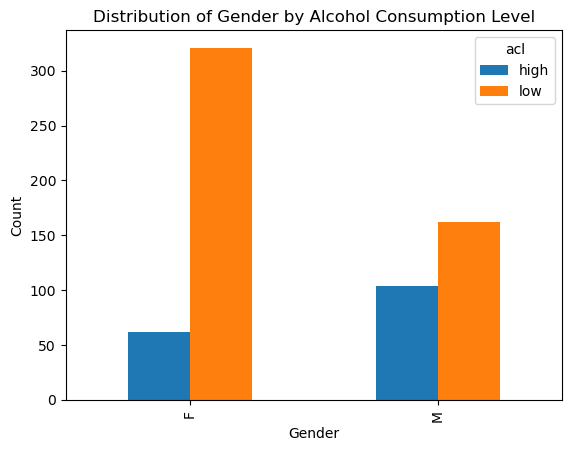

In [ ]:
# Plotting bar charts for the distribution of gender within each acl group
contingency_table.plot(kind='bar', stacked=False)
plt.title('Distribution of Gender by Alcohol Consumption Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Question 6 (2pts)

Chi-square test of independence of the two variables (`acl` and `gender`) in the contingency table.

**Set hypythesis**(1pt)

**Perform the test and make conclusions**(1pt)

## 답
### Null Hypothesis (H0): There is no association between alcohol consumption level and gender. In other words, the two variables are independent.
### Alternative Hypothesis (H1): There is an association between alcohol consumption level and gender. The two variables are not independent.

In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print(f'유의수준: {alpha}')
print(f'카이제곱 통계량: {chi2_stat}')
print(f'P-값: {p_value}')


if p_value < alpha:
    print("귀무 가설 기각: 'acl'과 'gender'는 서로 독립적이지 않습니다.")
else:
    print("귀무 가설 기각 실패: 'acl'과 'gender'는 독립적입니다.")


유의수준: 0.05
카이제곱 통계량: 42.08718662606401
P-값: 8.72933011769437e-11
귀무 가설 기각: 'acl'과 'gender'는 서로 독립적이지 않습니다.
